In [18]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [13]:
X, y = mnist.data, mnist.target

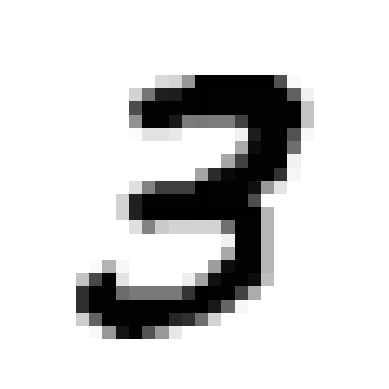

In [14]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

some_digit = X[7]
plot_digit(some_digit)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [21]:
# function to split test (doesn't work when sth is added)
# stratify helps to keep proportions according to y
def split_data(X, y, test_size=0.2, random_state=77):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                        random_state=random_state, stratify = y)
    return X_train, X_test, y_train, y_test


# Test whether it is 7 or not (binary classification)

In [25]:
y_train_7 = (y_train == '7')
y_test_7 = (y_test == '7')

In [29]:
example_7 = X[15]

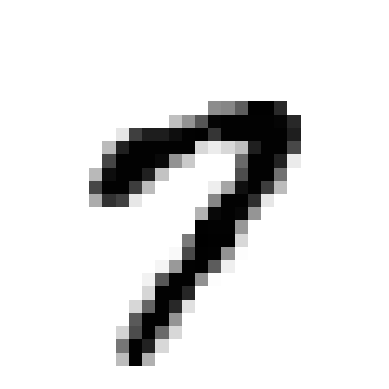

In [30]:
plot_digit(example_7)

In [26]:
from sklearn.svm import SVC

In [31]:
svc_clf = SVC(random_state=77)
svc_clf.fit(X_train, y_train_7)

SVC(random_state=77)

In [36]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(svc_clf, X_train, y_train_7, cv=3, scoring='accuracy')

In [37]:
print(score)
print(score.mean())

[0.9945  0.99305 0.99415]
0.9939


## macierz pomylek

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(svc_clf, X_train, y_train_7, cv=3)
cm = confusion_matrix(y_train_7, y_train_pred)
print(cm)

[[53630   105]
 [  261  6004]]
